<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Garage3" data-toc-modified-id="Garage3-1">Garage3</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-1.1">Standard ICP</a></span></li><li><span><a href="#With-Segmentation" data-toc-modified-id="With-Segmentation-1.2">With Segmentation</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-1.3">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-1" data-toc-modified-id="Rumlang-1-2">Rumlang 1</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-2.1">Standard ICP</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-2.2">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-2" data-toc-modified-id="Rumlang-2-3">Rumlang 2</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-3.1">Standard ICP</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-3.2">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-3" data-toc-modified-id="Rumlang-3-4">Rumlang 3</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-4.1">Standard ICP</a></span></li></ul></li></ul></div>

In [8]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.interpolate
import scipy.spatial.transform as stf
import re
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from bfseg.utils.models import create_model
import bfseg.data.hive.office_rumlang_validation_labeled
from shutil import make_archive
import tikzplotlib
%matplotlib inline

mask = cv2.imread('/home/blumh/mask.png', cv2.IMREAD_UNCHANGED)

# Rumlang 1
## Localisation

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
#plt.plot(icp['trans_x'], icp['trans_y'])
#plt.plot(leica['aligned_x'], leica['aligned_y'])
#plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
print('NYU Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))
nyuicp = icp
nyuleica = leica

icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_online_learning_rumlang1_icp_46.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_online_learning_rumlang1_leica_46.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
plt.plot(nyuicp['headerstamp'], nyuicp['rmse_xy'].rolling(10).mean())
plt.plot(icp['headerstamp'], icp['rmse_xy'].rolling(10).mean())
plt.show()
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

NYU Mean: 0.147, Median: 0.091


<Figure size 432x288 with 0 Axes>

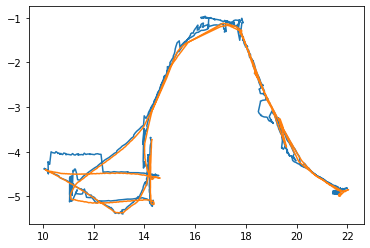

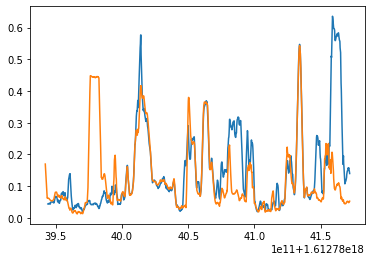

Mean: 0.125, Median: 0.076


In [2]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
#plt.plot(icp['trans_x'], icp['trans_y'])
#plt.plot(leica['aligned_x'], leica['aligned_y'])
#plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
print('NYU Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))
nyuicp = icp
nyuleica = leica

icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_online_learning_rumlang1_icp_61.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_online_learning_rumlang1_leica_61.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
plt.plot(nyuicp['headerstamp'], nyuicp['rmse_xy'].rolling(10).mean())
plt.plot(icp['headerstamp'], icp['rmse_xy'].rolling(10).mean())
plt.show()
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

In [12]:

# load the  model
_, full_model = create_model(model_name="fast_scnn",
                            freeze_encoder=False,
                            freeze_whole_model=False,
                            normalization_type="group",
                            image_h=480,
                            image_w=640)
model = tf.keras.Model(inputs=full_model.input, 
                       outputs=full_model.output)
optimizer = tf.keras.optimizers.Adam(.1)
checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=model)

ds = tfds.load('office_rumlang_validation_labeled', split='RUMLANG', as_supervised=True)

mious = []
for ckpt_num in sorted(int(p[5:-6]) 
        for p in tf.io.gfile.listdir('/tmp/online_learning_3') 
        if p.endswith('index'))[:200:10]:
  checkpoint.restore('/tmp/online_learning_3/ckpt-{}'.format(ckpt_num)).expect_partial()
  miou = tf.keras.metrics.MeanIoU(num_classes=2)
  for batch in ds.batch(10):
    pred = tf.argmax(model(
            tf.image.convert_image_dtype(batch[0], tf.float32)),
            axis=-1)
    miou.update_state(batch[1], pred)
  res = miou.result()
  print(ckpt_num, res.numpy())
  mious.append(res)



Using the following parameters to instantiate the model fast_scnn: {'input_shape': (480, 640, 3), 'num_downsampling_layers': 3, 'num_classes': 2, 'normalization_type': 'group'}.

1 0.35237557
11 0.3689018
21 0.33101282
31 0.3516034
41 0.3479138
51 0.3702445
61 0.34525725
71 0.33923534
81 0.3312225
91 0.33591518
101 0.3258874
111 0.323712
121 0.34049883


NYU Mean: 0.147, Median: 0.091


<Figure size 432x288 with 0 Axes>

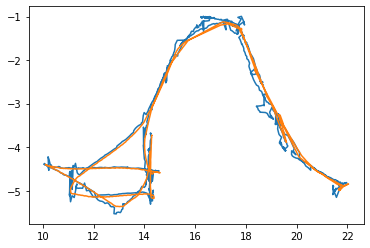

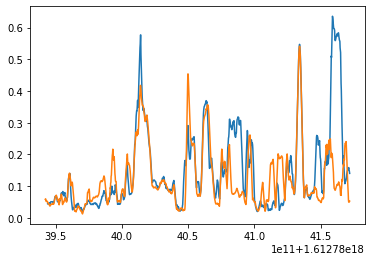

Mean: 0.124, Median: 0.085


In [5]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
#plt.plot(icp['trans_x'], icp['trans_y'])
#plt.plot(leica['aligned_x'], leica['aligned_y'])
#plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
print('NYU Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))
nyuicp = icp
nyuleica = leica

icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_online_learning_rumlang1_icp_62.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_online_learning_rumlang1_leica_62.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
plt.plot(nyuicp['headerstamp'], nyuicp['rmse_xy'].rolling(10).mean())
plt.plot(icp['headerstamp'], icp['rmse_xy'].rolling(10).mean())
plt.show()
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

Text(0.5, 0, 'time [s]')

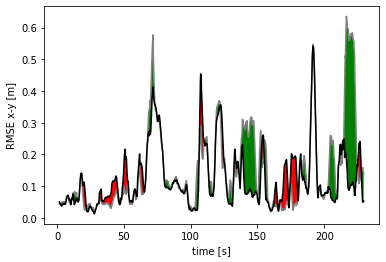

In [6]:
compare = icp[['headerstamp', 'rmse_xy']].merge(
    nyuicp[['headerstamp', 'rmse_xy']],
    left_on='headerstamp',
    right_on='headerstamp',
    suffixes=['_online', '_nyu']
)

time = (compare['headerstamp'] - compare['headerstamp'][0]) / 1e9
nyu_xy = compare['rmse_xy_nyu'].rolling(10).mean()
online_xy = compare['rmse_xy_online'].rolling(10).mean()

plt.plot(time, nyu_xy, c='gray')
plt.plot(time, online_xy, c='black')
plt.fill_between(time, nyu_xy, online_xy, where=online_xy<nyu_xy, facecolor='green', interpolate=True)
plt.fill_between(time, nyu_xy, online_xy, where=online_xy>nyu_xy, facecolor='red', interpolate=True)
plt.ylabel('RMSE x-y [m]')
plt.xlabel('time [s]')


Using the following parameters to instantiate the model fast_scnn: {'input_shape': (480, 640, 3), 'num_downsampling_layers': 3, 'num_classes': 2, 'normalization_type': 'group'}.



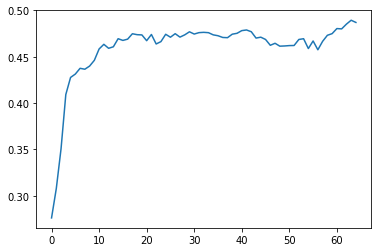

In [3]:
# load the  model
_, full_model = create_model(model_name="fast_scnn",
                            freeze_encoder=False,
                            freeze_whole_model=False,
                            normalization_type="group",
                            image_h=480,
                            image_w=640)
model = tf.keras.Model(inputs=full_model.input, 
                       outputs=full_model.output)
checkpoint = tf.train.Checkpoint(model=model)

ds = tfds.load('office_rumlang_validation_labeled', split='RUMLANG', as_supervised=True)

mious = []
for ckpt_num in sorted(int(p[5:-6]) 
        for p in tf.io.gfile.listdir('/home/blumh/asl/rss_2021_data/online_learning_1') 
        if p.endswith('index'))[::2]:
  checkpoint.restore('/home/blumh/asl/rss_2021_data/online_learning_1/ckpt-{}'.format(ckpt_num)).expect_partial()
  miou = tf.keras.metrics.MeanIoU(num_classes=2)
  for batch in ds.batch(1):
    pred = tf.argmax(model(
            tf.image.convert_image_dtype(batch[0], tf.float32)),
            axis=-1)
    miou.update_state(batch[1][0][mask != 0], pred[0][mask != 0])
    #miou.update_state(batch[1], pred)
  res = miou.result()
  #print(ckpt_num, res.numpy())
  mious.append(res)
plt.plot(range(len(mious)), mious)


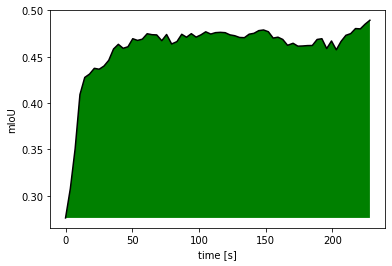

In [9]:
plt.plot(time[::20], mious[:-1], c='black')
plt.fill_between(time[::20], mious[0], mious[:-1],
    where=mious[:-1]>mious[0], facecolor='green',
    interpolate=True)
plt.ylabel('mIoU')
plt.xlabel('time [s]')
tikzplotlib.save('/tmp/plot.tex')
plt.show()

In [10]:
!cat /tmp/plot.tex

% This file was created by tikzplotlib v0.9.8.
\begin{tikzpicture}

\begin{axis}[
tick align=outside,
tick pos=left,
x grid style={white!69.0196078431373!black},
xlabel={time [s]},
xmin=-11.4117575, xmax=239.6469075,
xtick style={color=black},
y grid style={white!69.0196078431373!black},
ylabel={mIoU},
ymin=0.265444102883339, ymax=0.500015017390251,
ytick style={color=black}
]
\path [fill=green!50.1960784313725!black]
(axis cs:0,0.276106417179108)
--(axis cs:3.599911,0.276106417179108)
--(axis cs:7.19982,0.276106417179108)
--(axis cs:10.799728,0.276106417179108)
--(axis cs:14.399695,0.276106417179108)
--(axis cs:17.999608,0.276106417179108)
--(axis cs:21.599534,0.276106417179108)
--(axis cs:25.199484,0.276106417179108)
--(axis cs:28.799341,0.276106417179108)
--(axis cs:32.399337,0.276106417179108)
--(axis cs:36.000725,0.276106417179108)
--(axis cs:39.599148,0.276106417179108)
--(axis cs:43.199071,0.276106417179108)
--(axis cs:46.798993,0.276106417179108)
--(axis cs:50.398915,0.27610641

In [2]:
# Dump models for localisation comparison
# load the  model
_, full_model = create_model(model_name="fast_scnn",
                            freeze_encoder=False,
                            freeze_whole_model=False,
                            normalization_type="group",
                            image_h=480,
                            image_w=640)
model = tf.keras.Model(inputs=full_model.input, 
                       outputs=full_model.output)
checkpoint = tf.train.Checkpoint(model=model)

for ckpt_num in sorted(int(p[5:-6]) 
        for p in tf.io.gfile.listdir('/home/blumh/asl/rss_2021_data/online_learning_1') 
        if p.endswith('index'))[::10]:
  checkpoint.restore('/home/blumh/asl/rss_2021_data/online_learning_1/ckpt-{}'.format(ckpt_num)).expect_partial()
  model.save('/tmp/ol1-ckpt-{}'.format(ckpt_num))


Using the following parameters to instantiate the model fast_scnn: {'input_shape': (480, 640, 3), 'num_downsampling_layers': 3, 'num_classes': 2, 'normalization_type': 'group'}.

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/ol1-ckpt-1/assets
INFO:tensorflow:Assets written to: /tmp/ol1-ckpt-11/assets
INFO:tensorflow:Assets written to: /tmp/ol1-ckpt-21/assets
INFO:tensorflow:Assets written to: /tmp/ol1-ckpt-31/assets
INFO:tensorflow:Assets written to: /tmp/ol1-ckpt-41/assets
INFO:tensorflow:Assets written to: /tmp/ol1-ckpt-51/assets
INFO:tensorflow:Assets written to: /tmp/ol1-ckpt-61/assets
INFO:tensorflow:Assets written to: /tmp/ol1-ckpt-71/assets
INFO:tensorflow:Assets written to: /tmp/ol1-ckpt-81/assets
INFO:tensorflow:Assets written to: /tmp/ol1-ckpt-91/asse

In [4]:
for n in range(1, 130, 20):
    make_archive('/tmp/ol1-ckpt-{}'.format(n), 'zip', '/tmp/ol1-ckpt-{}'.format(n))
    !rclone copy /tmp/ol1-ckpt-{n}.zip construction:/background_foreground_segmentation_paper/online_learning_models/

# Rumlang 2

NYU Mean: 0.135, Median: 0.119


<Figure size 432x288 with 0 Axes>

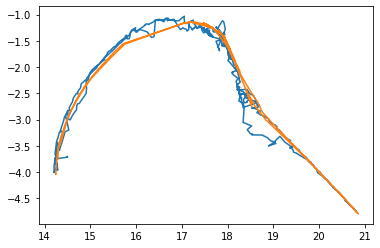

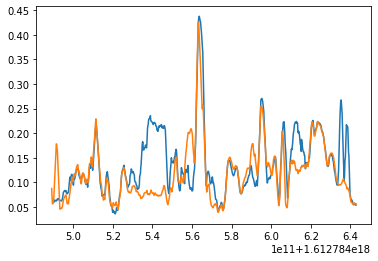

Mean: 0.119, Median: 0.105


In [2]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
#plt.plot(icp['trans_x'], icp['trans_y'])
#plt.plot(leica['aligned_x'], leica['aligned_y'])
#plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
print('NYU Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))
nyuicp = icp
nyuleica = leica

icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_online_learning_rumlang2_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_online_learning_rumlang2_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
plt.plot(nyuicp['headerstamp'], nyuicp['rmse_xy'].rolling(10).mean())
plt.plot(icp['headerstamp'], icp['rmse_xy'].rolling(10).mean())
plt.show()
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

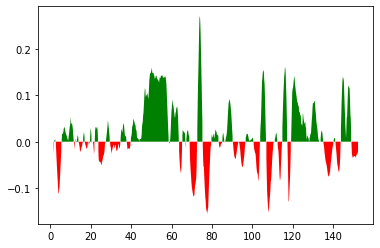

In [14]:
time = (icp['headerstamp'] - icp['headerstamp'][0])/1e9
relative_xy = (nyuicp['rmse_xy'] - icp['rmse_xy']).rolling(10).mean()
plt.fill_between(time, 0, relative_xy, where=relative_xy>0, facecolor='green')
plt.fill_between(time, 0, relative_xy, where=relative_xy<0, facecolor='red')

In [4]:
# load the  model
_, full_model = create_model(model_name="fast_scnn",
                            freeze_encoder=False,
                            freeze_whole_model=False,
                            normalization_type="group",
                            image_h=480,
                            image_w=640)
model = tf.keras.Model(inputs=full_model.input, 
                       outputs=full_model.output)
optimizer = tf.keras.optimizers.Adam(.1)
checkpoint = tf.train.Checkpoint(model=model)

ds = tfds.load('office_rumlang_validation_labeled', split='RUMLANG', as_supervised=True)

mious = []
for ckpt_num in sorted(int(p[5:-6]) 
        for p in tf.io.gfile.listdir('/tmp/online_learning_4') 
        if p.endswith('index'))[::2]:
  checkpoint.restore('/tmp/online_learning_4/ckpt-{}'.format(ckpt_num)).expect_partial()
  miou = tf.keras.metrics.MeanIoU(num_classes=2)
  for batch in ds.batch(10):
    pred = tf.argmax(model(
            tf.image.convert_image_dtype(batch[0], tf.float32)),
            axis=-1)
    miou.update_state(batch[1], pred)
  res = miou.result()
  print(ckpt_num, res.numpy())
  mious.append(res)



Using the following parameters to instantiate the model fast_scnn: {'input_shape': (480, 640, 3), 'num_downsampling_layers': 3, 'num_classes': 2, 'normalization_type': 'group'}.

1 0.29405522
3 0.28727984
5 0.2464306
7 0.2697206
9 0.3129058
11 0.32320976
13 0.31784758
15 0.3158365
17 0.28997883
19 0.3016053
21 0.2975192
23 0.30372357
25 0.30624875
27 0.30858904
29 0.3059981
31 0.30135238
33 0.31694072
35 0.31328967
37 0.30958644
39 0.32135886
41 0.3231778
43 0.3190382
45 0.32077828
47 0.31739774
49 0.31953633
51 0.32005805
53 0.3227912
55 0.32225335
57 0.32231116
59 0.31947127
61 0.3193907
63 0.3219835
65 0.32166785
67 0.321855
69 0.32268378
71 0.32091743
73 0.32183713
75 0.3225689
77 0.32146513
79 0.31969613
81 0.31990397
83 0.3179782
85 0.31925118
87 0.32232624


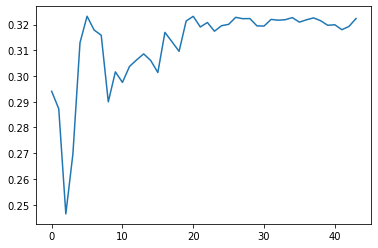

In [7]:
plt.plot(range(len(mious)), mious)

## Segmentation from NYU

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Online Office 7

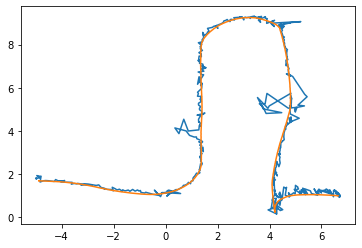

Mean: 0.196, Median: 0.145


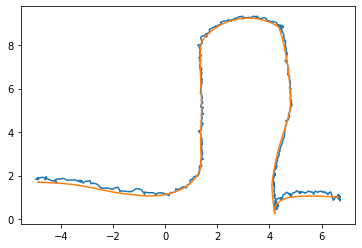

Mean: 0.168, Median: 0.157


Text(0.5, 0, 'time [s]')

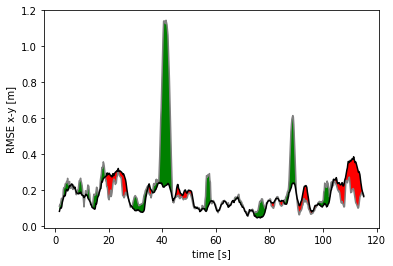

In [9]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office7_icp_4.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office7_leica_4.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

nyuicp = icp
nyuleica = leica

icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_online_office7_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_online_office7_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
#icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

compare = icp[['headerstamp', 'rmse_xy']].merge(
    nyuicp[['headerstamp', 'rmse_xy']],
    left_on='headerstamp',
    right_on='headerstamp',
    suffixes=['_online', '_nyu']
)

time = (compare['headerstamp'] - compare['headerstamp'][0]) / float(1e9)
nyu_xy = compare['rmse_xy_nyu'].rolling(10).mean()
online_xy = compare['rmse_xy_online'].rolling(10).mean()

plt.plot(time, nyu_xy, c='gray')
plt.plot(time, online_xy, c='black')
plt.fill_between(time, nyu_xy, online_xy, where=online_xy<nyu_xy, facecolor='green', interpolate=True)
plt.fill_between(time, nyu_xy, online_xy, where=online_xy>nyu_xy, facecolor='red', interpolate=True)
plt.ylabel('RMSE x-y [m]')
plt.xlabel('time [s]')


Using the following parameters to instantiate the model fast_scnn: {'input_shape': (480, 640, 3), 'num_downsampling_layers': 3, 'num_classes': 2, 'normalization_type': 'group'}.



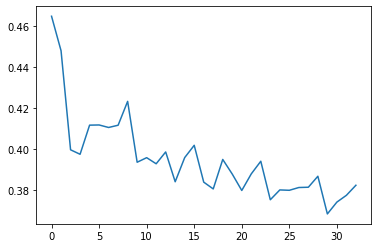

In [12]:
# load the  model
_, full_model = create_model(model_name="fast_scnn",
                            freeze_encoder=False,
                            freeze_whole_model=False,
                            normalization_type="group",
                            image_h=480,
                            image_w=640)
model = tf.keras.Model(inputs=full_model.input, 
                       outputs=full_model.output)
checkpoint = tf.train.Checkpoint(model=model)

ds = tfds.load('office_rumlang_validation_labeled', split='OFFICE', as_supervised=True)

mious = []
for ckpt_num in sorted(int(p[5:-6]) 
        for p in tf.io.gfile.listdir('/home/blumh/asl/rss_2021_data/online_learning_2') 
        if p.endswith('index'))[::2]:
  checkpoint.restore('/home/blumh/asl/rss_2021_data/online_learning_2/ckpt-{}'.format(ckpt_num)).expect_partial()
  miou = tf.keras.metrics.MeanIoU(num_classes=2)
  for batch in ds.batch(1):
    pred = tf.argmax(model(
            tf.image.convert_image_dtype(batch[0], tf.float32)),
            axis=-1)
    miou.update_state(batch[1][0][mask != 0], pred[0][mask != 0])
  res = miou.result()
  #print(ckpt_num, res.numpy())
  mious.append(res)
plt.plot(range(len(mious)), mious)

# Our Segmentation

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_rumlang1_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_rumlang1_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Rumlang 2
## Standard ICP

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang2_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang2_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_x'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_y'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

In [ ]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp']  + 1.65e9, leica['aligned_x'])
plt.xlim(1.612784e18+5.0e11, 1.612784e18+5.1e11)
plt.ylim(14.5, 16.5)

## Segmentation from NYU

with Francescos pretraine model:

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Rumlang 3
## Standard ICP

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang3_leica_1.csv')
# remove single outlier measurement
leica = leica.drop(index=307)
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## NYU Pretraining

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang3_leica_1.csv')
# remove single outlier measurement
leica = leica.drop(index=307)
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

In [ ]:
plt.plot(range(20), leica['trans_x'][306:320])

In [ ]:
plt.plot(range(20), leica['trans_x'][300:320])

In [ ]:
leica.iloc[306:309]

# Office4
## Standard ICP

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_icp_5.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_leica_5.csv')
# alignment of reference frames
leica['aligned_x'] = leica['trans_x']
leica['aligned_y'] = leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_icp_8.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_leica_8.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

In [ ]:
plt.plot(icp['headerstamp'], icp['trans_y'])
plt.plot(leica['headerstamp'] + 4e8, leica['aligned_y'])
plt.xlim(1.613643e18+6.6e11, 1.613643e18+6.8e11)
plt.ylim(6, 10)

## NYU Pretraining

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office4_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office4_leica_3.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Office5
## Standard ICP

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_icp_4.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_leica_4.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_icp_5.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_leica_5.csv')
# alignment of reference frames
leica['aligned_x'] = leica['trans_x']
leica['aligned_y'] = leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

## NYU Pretraining

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office5_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office5_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Office6
## Standard ICP

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office6_icp_6.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office6_leica_6.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## NYU Segmentation

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office6_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office6_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))